<h2>Titanic Machine Learning From Disaster - Exploratory Analysis and Cross Validation</h2>

In [1]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")
print("Train Shape:",train.shape)
print("Test Shape:",test.shape)

Train Shape: (891, 12)
Test Shape: (418, 11)


In [4]:
train.isnull().sum()

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Data Dictionary

* Survived: 0 = No, 1 = Yes
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* cabin: Cabin number
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test["Survived"] = ""
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,


# Exploratory analysis - Data Visualization 

In [9]:
import matplotlib.pyplot as plt # Plot the graphs
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

# Bar Chart for Categorical Features 

* Pclass
* Sex
* SibSp ( # of siblings and spouse)
* Parch ( # of parents and children)
* Embarked
* Cabin

In [10]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


<AxesSubplot:>

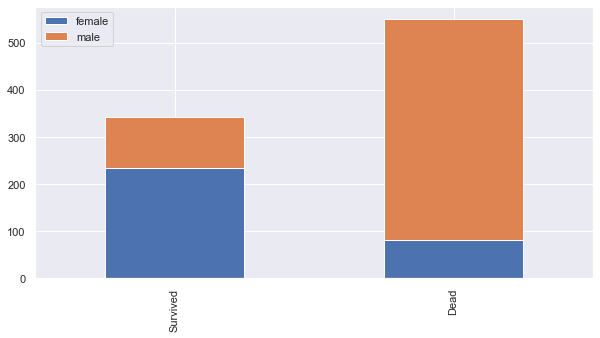

In [11]:
survived_sex = train[train['Survived']==1]['Sex'].value_counts()
dead_sex = train[train['Survived']==0]['Sex'].value_counts()

print("Survived :\n",train[train['Survived']==1]['Sex'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Sex'].value_counts())

df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

The Chart confirms **Women more likely survivied than Men**.

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


<AxesSubplot:>

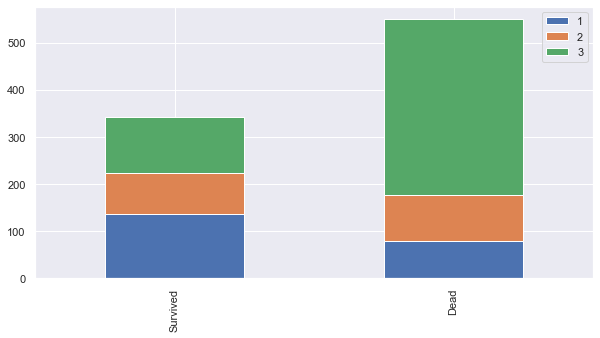

In [12]:
survived_pclass = train[train['Survived']==1]['Pclass'].value_counts()
dead_pclass= train[train['Survived']==0]['Pclass'].value_counts()

print("Survived :\n",train[train['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Pclass'].value_counts())

df = pd.DataFrame([survived_pclass,dead_pclass])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

The Chart confirms **1st class** more likely survivied than **other classes**.  
The Chart confirms **3rd class** more likely dead than **other classes**

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot:>

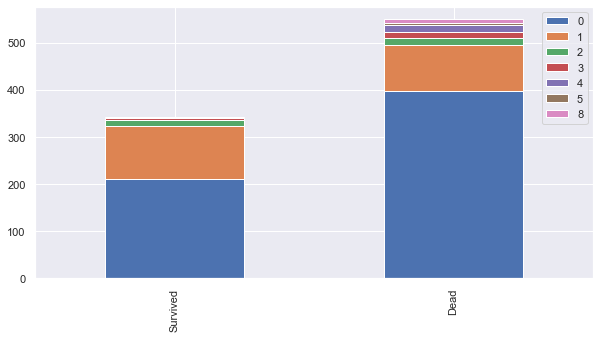

In [13]:
survived_sibsp = train[train['Survived']==1]['SibSp'].value_counts()
dead_sibsp= train[train['Survived']==0]['SibSp'].value_counts()

print("Survived :\n",train[train['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",train[train['Survived']==0]['SibSp'].value_counts())

df = pd.DataFrame([survived_sibsp,dead_sibsp])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


<AxesSubplot:>

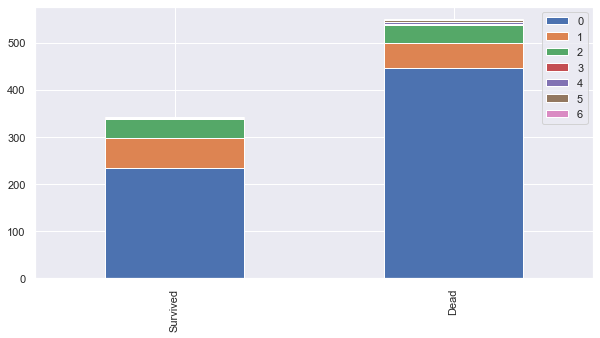

In [14]:
survived_parch = train[train['Survived']==1]['Parch'].value_counts()
dead_parch= train[train['Survived']==0]['Parch'].value_counts()

print("Survived :\n",train[train['Survived']==1]['Parch'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Parch'].value_counts())

df = pd.DataFrame([survived_parch,dead_parch])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


<AxesSubplot:>

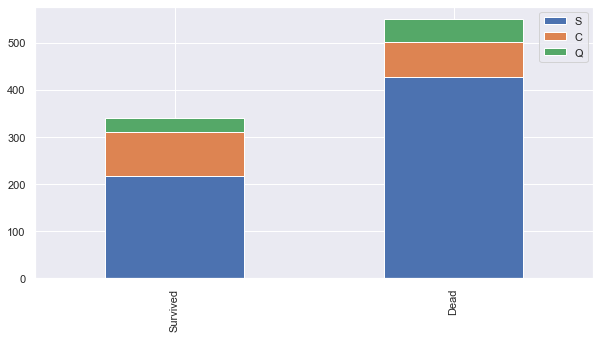

In [15]:
survived_embarked = train[train['Survived']==1]['Embarked'].value_counts()
dead_embarked= train[train['Survived']==0]['Embarked'].value_counts()

print("Survived :\n",train[train['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Embarked'].value_counts())

df = pd.DataFrame([survived_embarked,dead_embarked])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

The Chart confirms a **person aboarded from C** slightly more likely survived.  
The Chart confirms a **person aboarded from Q** more likely dead.  
The Chart confirms a **person aboarded from S** more likely dead.  

## 4. Feature Selection

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train_test_data = [train,test] # combine dataset


In [18]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

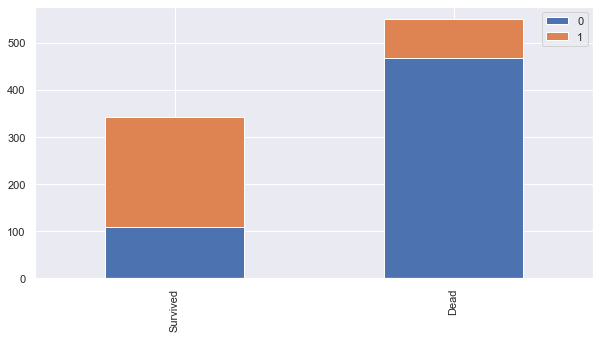

In [21]:
bar_chart('Sex')

In [22]:
test.head(30)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,
5,897,3,0,14.0,0,0,7538,9.2250,NaN,S,
6,898,3,1,30.0,0,0,330972,7.6292,NaN,Q,
7,899,2,0,26.0,1,1,248738,29.0000,NaN,S,
8,900,3,1,18.0,0,0,2657,7.2292,NaN,C,
9,901,3,0,21.0,2,0,A/4 48871,24.1500,NaN,S,


As we could see, there are few samples for which Age is not provided and it has NaN as the value.

In such cases, we could either ignore those rows or fill with any default value. Here we use median as the default value

In [23]:
train.groupby("Sex")["Age"].transform("median")

0      29.0
1      27.0
2      27.0
3      27.0
4      29.0
       ... 
886    29.0
887    27.0
888    27.0
889    29.0
890    29.0
Name: Age, Length: 891, dtype: float64

In [24]:
train["Age"].fillna(train.groupby("Sex")["Age"].transform("median"), inplace= True)
test["Age"].fillna(test.groupby('Sex')['Age'].transform("median"), inplace= True)

In [25]:
test.head(30)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,
5,897,3,0,14.0,0,0,7538,9.2250,NaN,S,
6,898,3,1,30.0,0,0,330972,7.6292,NaN,Q,
7,899,2,0,26.0,1,1,248738,29.0000,NaN,S,
8,900,3,1,18.0,0,0,2657,7.2292,NaN,C,
9,901,3,0,21.0,2,0,A/4 48871,24.1500,NaN,S,


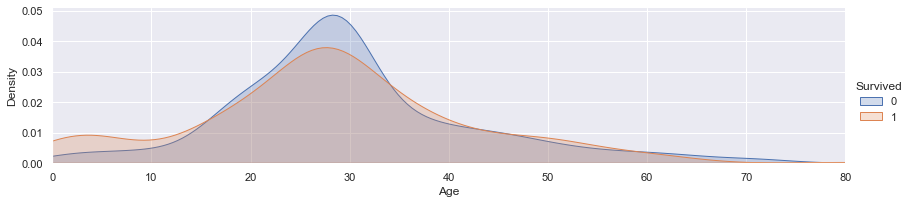

(10.0, 50.0)

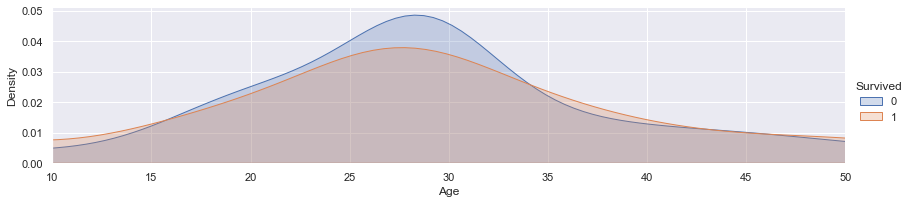

In [26]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend() 
plt.show()

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend() 
plt.xlim(10,50)


Those who were **20 to 30 years old** were **more dead and more survived.**

In [27]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex     

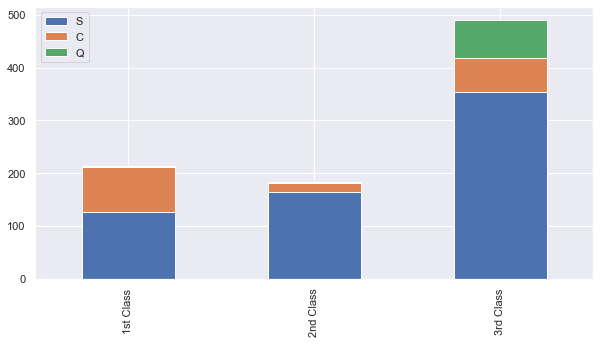

Pclass1:
 S    127
C     85
Q      2
Name: Embarked, dtype: int64
Pclass2:
 S    164
C     17
Q      3
Name: Embarked, dtype: int64
Pclass3:
 S    353
Q     72
C     66
Name: Embarked, dtype: int64


In [28]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st Class','2nd Class','3rd Class']
df.plot(kind = 'bar', stacked =  True, figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

more than 50 % of 1st class are from S embark.  
more than 50 % of 2st class are from S embark.   
more than 50 % of 3st class are from S embark.  

** Since majority of the passengers are from S embark, safe assumption is to fill out missing embark with S embark**

In [29]:
for dataset in train_test_data:
    dataset['Embarked'] =  dataset['Embarked'].fillna('S')

In [30]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S


In [31]:
embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0


In [33]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0
5,6,0,3,0,29.0,0,0,330877,8.4583,NaN,2
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,0
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,0
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,1


In [34]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [35]:
for dataset in train_test_data:
    dataset['Cabin'] =  dataset['Cabin'].str[:1]

<AxesSubplot:>

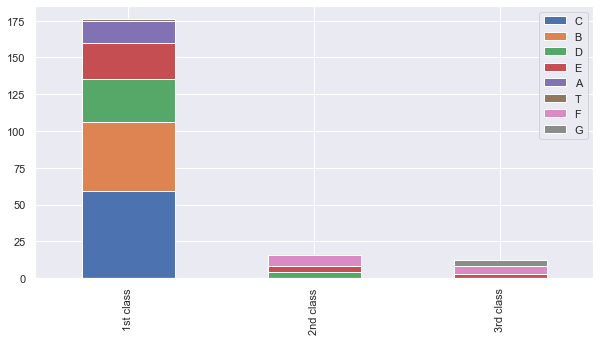

In [36]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [37]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [38]:
train.Cabin.value_counts()

0.8    59
0.4    47
1.2    33
1.6    32
0.0    15
2.0    13
2.4     4
2.8     1
Name: Cabin, dtype: int64

In [39]:
# fill missing Cabin with median Cabin mapped value for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 76.7+ KB


In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0
3,4,1,1,1,35.0,1,0,113803,53.1000,0.8,0
4,5,0,3,0,35.0,0,0,373450,8.0500,2.0,0


In [42]:
features_drop = ['Ticket','SibSp','Parch']
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop,axis=1)
train = train.drop(['PassengerId'], axis=1)

In [43]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']
train_data.shape, target.shape

((891, 6), (891,))

In [44]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked
0,3,0,22.0,7.2500,2.0,0
1,1,1,38.0,71.2833,0.8,1
2,3,1,26.0,7.9250,2.0,0
3,1,1,35.0,53.1000,0.8,0
4,3,0,35.0,8.0500,2.0,0
5,3,0,29.0,8.4583,2.0,2
6,1,0,54.0,51.8625,1.6,0
7,3,0,2.0,21.0750,2.0,0
8,3,1,27.0,11.1333,2.0,0
9,2,1,14.0,30.0708,1.8,1


# 5. Modelling

In [45]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 48.9 KB


# 6.Cross Validation(k-fold)

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [48]:
knnClassification = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(knnClassification, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.73333333 0.76404494 0.71910112 0.61797753 0.66292135 0.69662921
 0.74157303 0.7752809  0.68539326 0.73033708]


#### Parmeter Tuning for KNN Classification

In [49]:
for k in range(1,20):
    print("K =", k,
         "  Accuracy =", np.mean(cross_val_score(KNeighborsClassifier(n_neighbors = k),train_data, target, cv = k_fold)))

K = 1   Accuracy = 0.674569288389513
K = 2   Accuracy = 0.6858052434456929
K = 3   Accuracy = 0.7138951310861423
K = 4   Accuracy = 0.6936579275905119
K = 5   Accuracy = 0.6868789013732834
K = 6   Accuracy = 0.6936079900124843
K = 7   Accuracy = 0.7048064918851435
K = 8   Accuracy = 0.6980774032459426
K = 9   Accuracy = 0.7160424469413234
K = 10   Accuracy = 0.7081897627965044
K = 11   Accuracy = 0.7126716604244694
K = 12   Accuracy = 0.7048189762796504
K = 13   Accuracy = 0.7126591760299625
K = 14   Accuracy = 0.7183021223470661
K = 15   Accuracy = 0.715992509363296
K = 16   Accuracy = 0.7160299625468165
K = 17   Accuracy = 0.7182521847690387
K = 18   Accuracy = 0.7148813982521847
K = 19   Accuracy = 0.712621722846442


In [50]:
for depth in range(1,20):
    print("Max depth =", depth,
          "    Accuracy =",
          np.mean(cross_val_score(DecisionTreeClassifier(
                max_depth = depth, random_state = 1234),  # algorithm
                train_data, # IDV
                target, # DV
                cv = k_fold) # number of folds
                ))

Max depth = 1     Accuracy = 0.786741573033708
Max depth = 2     Accuracy = 0.7653932584269664
Max depth = 3     Accuracy = 0.8092009987515606
Max depth = 4     Accuracy = 0.8058177278401999
Max depth = 5     Accuracy = 0.8058052434456929
Max depth = 6     Accuracy = 0.8002247191011236
Max depth = 7     Accuracy = 0.8047066167290886
Max depth = 8     Accuracy = 0.8080774032459426
Max depth = 9     Accuracy = 0.8058426966292135
Max depth = 10     Accuracy = 0.801385767790262
Max depth = 11     Accuracy = 0.7901498127340825
Max depth = 12     Accuracy = 0.7856803995006242
Max depth = 13     Accuracy = 0.7935330836454433
Max depth = 14     Accuracy = 0.7856554307116105
Max depth = 15     Accuracy = 0.7923970037453183
Max depth = 16     Accuracy = 0.7856429463171036
Max depth = 17     Accuracy = 0.7856304619225968
Max depth = 18     Accuracy = 0.7867540574282148
Max depth = 19     Accuracy = 0.7856304619225968


In [51]:
for estimator in range(1,20):
    print("Number of estimators = ", estimator,
          "    Accuracy =",
          np.mean(cross_val_score(RandomForestClassifier(
                n_estimators = estimator, random_state = 190),  # algorithm
                train_data, # IDV
                target, # DV
                cv = k_fold) # number of folds
                ))

Number of estimators =  1     Accuracy = 0.7486142322097378
Number of estimators =  2     Accuracy = 0.7599001248439452
Number of estimators =  3     Accuracy = 0.7721847690387016
Number of estimators =  4     Accuracy = 0.7901747815230961
Number of estimators =  5     Accuracy = 0.7957428214731584
Number of estimators =  6     Accuracy = 0.8025093632958802
Number of estimators =  7     Accuracy = 0.7979775280898876
Number of estimators =  8     Accuracy = 0.7980024968789013
Number of estimators =  9     Accuracy = 0.7991260923845193
Number of estimators =  10     Accuracy = 0.8036079900124843
Number of estimators =  11     Accuracy = 0.8013607990012485
Number of estimators =  12     Accuracy = 0.8047191011235955
Number of estimators =  13     Accuracy = 0.8024843945068664
Number of estimators =  14     Accuracy = 0.8035955056179775
Number of estimators =  15     Accuracy = 0.8058551810237203
Number of estimators =  16     Accuracy = 0.8092134831460674
Number of estimators =  17     Ac

In [52]:
for n_est in range(1,20):
    print("Number of estimators = ", n_est,
          "Accuracy = ",
          np.mean(cross_val_score(GradientBoostingClassifier(n_estimators = n_est, random_state = 1234),train_data,target,cv = k_fold)))

Number of estimators =  1 Accuracy =  0.6162172284644195
Number of estimators =  2 Accuracy =  0.6240823970037453
Number of estimators =  3 Accuracy =  0.7811360799001248
Number of estimators =  4 Accuracy =  0.7845068664169788
Number of estimators =  5 Accuracy =  0.7833832709113608
Number of estimators =  6 Accuracy =  0.7833832709113608
Number of estimators =  7 Accuracy =  0.8013607990012483
Number of estimators =  8 Accuracy =  0.7990886392009988
Number of estimators =  9 Accuracy =  0.8046941323345818
Number of estimators =  10 Accuracy =  0.8024469413233458
Number of estimators =  11 Accuracy =  0.8058177278401997
Number of estimators =  12 Accuracy =  0.8069413233458176
Number of estimators =  13 Accuracy =  0.8035705368289637
Number of estimators =  14 Accuracy =  0.8035705368289637
Number of estimators =  15 Accuracy =  0.7990761548064919
Number of estimators =  16 Accuracy =  0.8024469413233458
Number of estimators =  17 Accuracy =  0.8058177278401997
Number of estimators = 

In [53]:
#learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
clf = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(max_depth = 10),
       RandomForestClassifier(n_estimators=10),GaussianNB(),SVC(),ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =5, random_state = 10),AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
#     round(np.mean(score)*100,2)
#     print("Score of :\n",score)
model_fit()

Score of Model 0 : 71.27
Score of Model 1 : 80.36
Score of Model 2 : 80.58
Score of Model 3 : 76.32
Score of Model 4 : 67.45
Score of Model 5 : 78.23
Score of Model 6 : 79.46
Score of Model 7 : 80.81
Score of Model 8 : 79.35


AdaBoostClassifier has the highest accuracy, hence it will be used for prediction

In [54]:
clf1 = AdaBoostClassifier()
clf1.fit(train_data, target)
test
test_data = test.drop(['Survived','PassengerId'], axis=1)
prediction = clf1.predict(test_data)
# test_data


In [55]:
test_data['Survived'] = prediction
submission = pd.DataFrame(test['PassengerId'],test_data['Survived'])
submission.to_csv("Submission.csv")